### Multi-Variate Linear Regression
---
We have discussed the uni-variate linear regression in detail in the earlier Jupyter Notebook. In this case we will have more than 2 parameters and also we have multiple variables like $x_{0},x_{1},x_{2},........,x_{n}$ when we have n+1 variable. Earlier we were doing our computations on 1 variable and now we perform the regression on n parameters. Hence, train our hypothesis and get ourgesired model.   

>IMPORTING LIBRARIES

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

>DATASET IMPORT + DISPLAY

In [2]:
data = np.genfromtxt('week_2.csv', delimiter=',')
data_x1 = data[:,0]
data_x2 = data[:,1]
data_y = data[:,2]
# Data Pre-Processing
data_x1 = data_x1/(max(data_x1)-min(data_x1))
data_x2 = data_x2/(max(data_x2)-min(data_x2))

> Plot the data

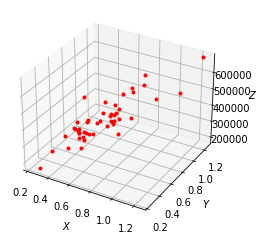

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for a,b,c in zip(data_x1,data_x2,data_y): plt.plot(a, b, c,'r.')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
plt.show()

> Main Algorithm for regression

In [4]:
#print(data_x1, data_x2)

# Constants:
prev_costfunc_y = -999
istrained = 0
alpha = 0.01
n = len(data_y)

# Initializint the parameters: y = m0 + m1x1 + m2x2
m0 = 1
m1 = 1
m2 = 1
m = [m0, m1, m2]

# Hypothesis Function:
def hypo_func(x1, x2):
    return m[0] + m[1]*x1 + m[2]*x2

# Cost Function
def cost_func():
    global istrained, prev_costfunc_y
    sum = 0

    for i in range(n):
        sum += (hypo_func(data_x1[i], data_x2[i]) - data_y[i])**2
    jy = (1/(2*n)) * sum

    if jy == prev_costfunc_y:
        istrained = 1
        return jy
    else:
        prev_costfunc_y = jy
        return jy

# Derivative cost_func(m ,c) w.r.t m:
def d_cost_func(fno):
    sum = 0

    if fno == 1:
        for i in range(n):
            sum += (hypo_func(data_x1[i], data_x2[i]) - data_y[i])*data_x1[i]

    elif fno == 2:
        for i in range(n):
            sum += (hypo_func(data_x1[i], data_x2[i]) - data_y[i])*data_x2[i]

    else:
        for i in range(n):
            sum += (hypo_func(data_x1[i], data_x2[i]) - data_y[i])

    return (1/n)*sum

# Gradient Descent Function:
def update():
    global m
    temp0 = m[0] - alpha*d_cost_func(0)
    temp1 = m[1] - alpha*d_cost_func(1)
    temp2 = m[2] - alpha*d_cost_func(2)
    m[0] = temp0
    m[1] = temp1
    m[2] = temp2

# Training:
# UNCOMMENT THE PRINT STATEMENTS TO SEE WHAT HAPPENS IN EACH STEP AND HOW THE PARAMETERS CONVERGE.
#I WOULD RECOMMEND DOING THIS AND I COULD NOT INCLUDE THIS AS THE FILE SIZE WAS TOO LARGE
#AND GITHUB WAS UNABLE TO RENDER

TRAIN_ITERATIONS = 10**6
for i in range(TRAIN_ITERATIONS):
    update()
    # print("Pass:", i)
    X = cost_func()
    # print("Cost function value:", X)
    # print("m0 = {}, m1 = {}, m2 = {}".format(m[0], m[1], m[2]))
    # print()
    if istrained:
        print("Model fully trained at pass = {} with alpha = {}".format(i-1, alpha))
        break
else:
    print("Max iteration reached!!!")
    print("Result produced with pass = {} and alpha = {}".format(TRAIN_ITERATIONS, alpha))

print("Parameters")
print(m[0], m[1], m[2])

Model fully trained at pass = 80734 with alpha = 0.01
Parameters
89597.58805689932 504777.49082836503 -34951.38959650025


> Final Plot

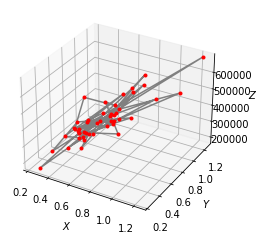

In [5]:
'''Pass: 80734
   Cost function value: 2043280050.6087253
   m0 = 89597.5880060581 , m1 = 504777.4907630261 , m2 = -34951.38948787827
   Model fully trained at pass = 80734 with alpha = 0.01
   '''

predict_y = list(map(hypo_func, data_x1, data_x2))

# plotting the prediction:
#plt.plot([min(data_x), max(data_x)], [min(data_y), max(data_y)], label='Original Plot')
# plt.scatter(data_x1, data_y, s=5)
# plt.scatter(data_x2, data_y, s=5)
# plt.plot(data_x1, predict_y, label='Prediction Plot', color='red')
# plt.show()
# # plt.legend()
# plt.xlabel('X Data -->')
# plt.ylabel('Y Data -->')
# plt.title('Regression in Python with multiple variables')
fig = plt.figure()
ax = plt.axes(projection='3d')
# eq = m[0] + m[1]*data_x1 + m[2]*data_x2
ax.plot3D( data_x1, data_x2, data_y, 'gray')
for a,b,c in zip(data_x1,data_x2,data_y): plt.plot(a, b, c,'r.')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
plt.show()

Hence, we get our trained model.